R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

In [8]:
# ggplot2 pruebas
library(ggplot2) 
library(dplyr)

In [9]:
#es una grafica que considera todos los casos posibles
con=matrix(0,nrow=1000, ncol=9);C=0
for (k in 1:9){
  for (i in 1:1000){
      cond=sample(c(0,1),1)#0=cerrado; 1=abierto
      N=sample(c(1,2,3),1)#no. personas dentro
      Ce=runif(1, min=380, max=400)#Ce varia entre 380 y 400 ppm
      if(k==1){Co=runif(1, min=364, max=400)}#varia entre 380 y 400 ppm
      ACH=runif(1, min=0.2, max=1)#ACH varia entre 0.2 y 1.0
      Q=ACH*173 #flujo en m3/s
      Resp=runif(1,min=12, max=16) #l/h
      t=seq(0, 1, length.out = 13)
      if (cond==0){
          C=Co+((N*Resp*1e6/173000)*t)}else{
             Cest=Ce+(Resp*1e06*N/(ACH*173000))
             C=Cest+((Co-Cest)*exp(-ACH*t))
      } 
      con[i,k]=median(C)
  }#fin del for i
  Co=median(con[,k])
}#fin del for k

In [10]:
library(ggplot2)
library(dplyr)
datosmod <- stack(as.data.frame(con))
levels(datosmod$ind)=c("7", "8", "9","10", "11", "12","13", "14", "15")

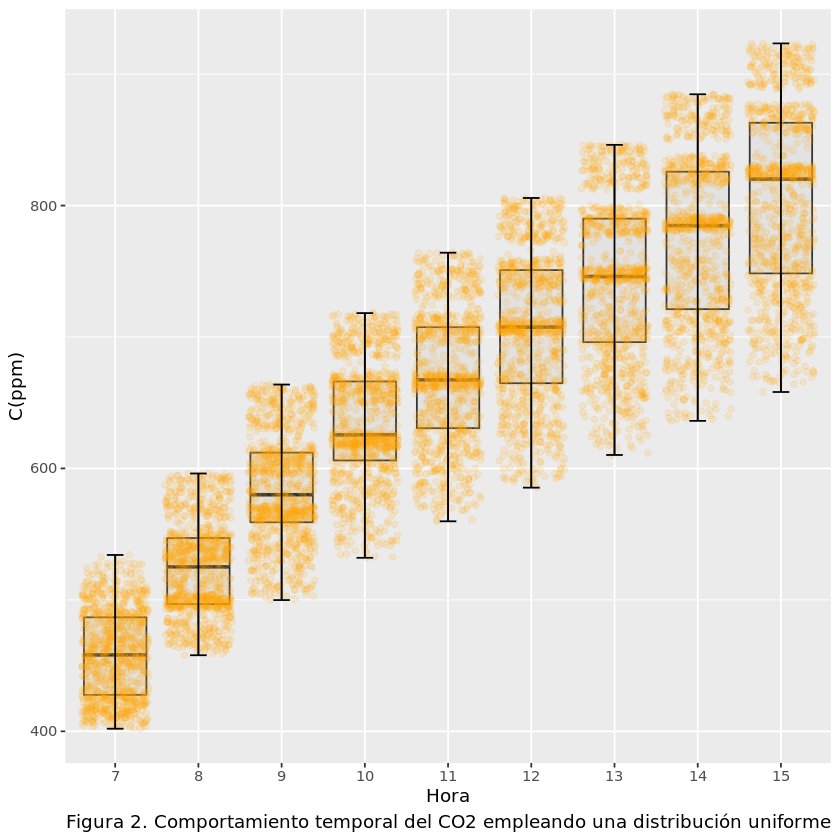

In [11]:
datosmod%>% 
  ggplot(mapping = aes(x =ind, y = values)) + 
  geom_boxplot(fill="gray",alpha=0.2)+
  geom_jitter(mapping = aes(x =ind, y =values),col="orange",alpha = .13)+
  stat_boxplot(geom = "errorbar",width = 0.2)+
  scale_y_continuous(breaks = seq(0, 1000, 200))+ #clave para modificar rotulos
  ylab("C(ppm)")+xlab("Hora")+
  labs(caption="Figura 2. Comportamiento temporal del CO2 empleando una distribución uniforme")+
  theme(plot.caption = element_text(hjust = 0.5,size=11))

In [12]:
con=matrix(0,nrow=1000, ncol=9);C=0
for (k in 1:9){
  for (i in 1:1000){
      cond=sample(c(0,1),1)#0=cerrado; 1=abierto
      N=sample(c(1,2,3),1)#no. personas dentro
      Ce=rnorm(1, mean=390, sd=5)#Ce varia entre 380 y 400 ppm
      if(k==1){Co=rnorm(1, mean=390, sd=5)}#varia entre 380 y 400 ppm
      ACH=rnorm(1, mean=0.6, sd=0.2)#ACH varia entre 0.2 y 1.0
      Q=ACH*173 #flujo en m3/s
      Resp=rnorm(1,mean=14, sd=1) #l/h
      t=seq(0, 1, length.out = 13)
      if (cond==0){
          C=Co+((N*Resp*1e6/173000)*t)}else{
             Cest=Ce+(Resp*1e06*N/(ACH*173000))
             C=Cest+((Co-Cest)*exp(-ACH*t))
      } 
      con[i,k]=median(C)
  }#fin del for i
  Co=median(con[,k])
}#fin del for k

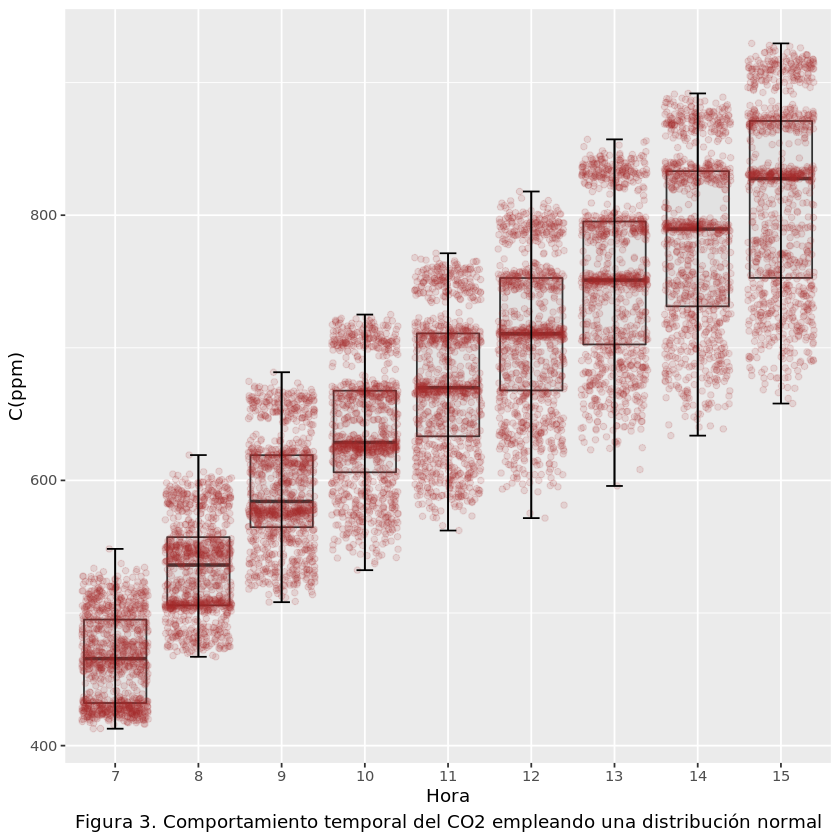

In [13]:
datosmod <- stack(as.data.frame(con))
levels(datosmod$ind)=c("7", "8", "9","10", "11", "12","13", "14", "15")

datosmod%>% 
  ggplot(mapping = aes(x =ind, y = values)) + 
  geom_boxplot(fill="gray",alpha=0.2)+
  geom_jitter(mapping = aes(x =ind, y =values),col="brown",alpha = .13)+
  stat_boxplot(geom = "errorbar",width = 0.2)+
  scale_y_continuous(breaks = seq(0, 1000, 200))+ #clave para modifucar rotulos
  ylab("C(ppm)")+xlab("Hora")+
  labs(caption="Figura 3. Comportamiento temporal del CO2 empleando una distribución normal")+
  theme(plot.caption = element_text(hjust = 0.5,size=11))